# Coffee Shop Revenue Prediction

- Number_of_Customers_Per_Day: jumlah pelanggan harian.
- Average_Order_Value: rata-rata transaksi per pelanggan.
- Operating_Hours_Per_Day: jam operasional toko dalam sehari.
- Marketing_Spend_Per_Day: pengeluaran harian untuk marketing.
- Location_Foot_Traffic: estimasi jumlah orang yang melintas di sekitar lokasi.
- Revenue_Level : tingkatan pendapatan harian

STEP 1: BASIC DATA UNDERSTANDING
- Dataframe shape
- head and tail
- dtypes
- describe
- value counts

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
try:
    coffe = pd.read_csv("coffee_shop_revenue_noisy.csv")
    print("Berhasil membaca data")
except Exception as e:
    print("gagal membaca data")

Berhasil membaca data


In [52]:
coffe.shape

(2200, 6)

In [53]:
coffe.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Revenue_Level
0,152.0,6.74,14.0,106.62,97.0,Medium
1,485.0,4.50,12.0,57.83,744.0,Medium
2,398.0,9.09,6.0,91.76,636.0,NaN
3,320.0,8.48,17.0,NaN,770.0,High
4,NaN,7.44,NaN,412.52,232.0,Medium


In [54]:
coffe.tail()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Revenue_Level
2195,264.0,4.20,12.0,63.58,998.0,Medium
2196,423.0,NaN,NaN,NaN,193.0,High
2197,398.0,8.67,17.0,NaN,543.0,High
2198,309.0,5.98,11.0,380.83,320.0,Medium
2199,363.0,7.24,11.0,197.59,861.0,High


In [55]:
coffe.describe().T.style.format("{:.2f}").background_gradient(cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
Number_of_Customers_Per_Day,1958.00,273.40,128.57,50.00,164.00,274.00,384.00,499.00
Average_Order_Value,2006.00,6.25,2.19,2.50,4.38,6.29,8.14,9.99
Operating_Hours_Per_Day,2010.00,11.69,3.42,6.00,9.00,12.00,15.00,17.00
Marketing_Spend_Per_Day,1994.00,251.28,140.62,10.12,130.00,249.50,374.15,499.74
Location_Foot_Traffic,1972.00,535.75,270.45,50.00,304.00,540.50,765.00,999.00


In [56]:
coffe['Operating_Hours_Per_Day'].unique()

array([14., 12.,  6., 17., nan, 11., 10.,  7., 13., 16., 15.,  9.,  8.])

In [57]:
coffe['Revenue_Level'].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [58]:
coffe.dtypes

Number_of_Customers_Per_Day    float64
Average_Order_Value            float64
Operating_Hours_Per_Day        float64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic          float64
Revenue_Level                   object
dtype: object

In [59]:
coffe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  1958 non-null   float64
 1   Average_Order_Value          2006 non-null   float64
 2   Operating_Hours_Per_Day      2010 non-null   float64
 3   Marketing_Spend_Per_Day      1994 non-null   float64
 4   Location_Foot_Traffic        1972 non-null   float64
 5   Revenue_Level                1998 non-null   object 
dtypes: float64(5), object(1)
memory usage: 103.3+ KB


In [60]:
for col in coffe.select_dtypes(include='number'):
    print(coffe[col].value_counts())

Number_of_Customers_Per_Day
112.0    12
484.0    11
148.0    11
391.0    11
264.0    11
         ..
80.0      1
383.0     1
79.0      1
463.0     1
121.0     1
Name: count, Length: 439, dtype: int64
Average_Order_Value
8.67    11
2.59    10
8.03     9
8.21     9
6.29     8
        ..
9.12     1
7.76     1
4.50     1
4.40     1
2.60     1
Name: count, Length: 681, dtype: int64
Operating_Hours_Per_Day
11.0    211
16.0    182
15.0    180
17.0    179
13.0    172
12.0    170
8.0     168
14.0    156
7.0     150
6.0     149
9.0     148
10.0    145
Name: count, dtype: int64
Marketing_Spend_Per_Day
300.32    3
472.45    3
305.86    3
138.72    3
68.68     3
         ..
325.91    1
184.09    1
34.09     1
281.55    1
273.32    1
Name: count, Length: 1787, dtype: int64
Location_Foot_Traffic
576.0    8
283.0    8
695.0    8
861.0    7
224.0    7
        ..
607.0    1
55.0     1
636.0    1
97.0     1
577.0    1
Name: count, Length: 806, dtype: int64


In [61]:
coffe.duplicated().sum()

np.int64(200)

In [62]:
coffe.isnull().sum()

Number_of_Customers_Per_Day    242
Average_Order_Value            194
Operating_Hours_Per_Day        190
Marketing_Spend_Per_Day        206
Location_Foot_Traffic          228
Revenue_Level                  202
dtype: int64

In [63]:
coffe.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Revenue_Level
0,152.0,6.74,14.0,106.62,97.0,Medium
1,485.0,4.50,12.0,57.83,744.0,Medium
2,398.0,9.09,6.0,91.76,636.0,NaN
3,320.0,8.48,17.0,NaN,770.0,High
4,NaN,7.44,NaN,412.52,232.0,Medium


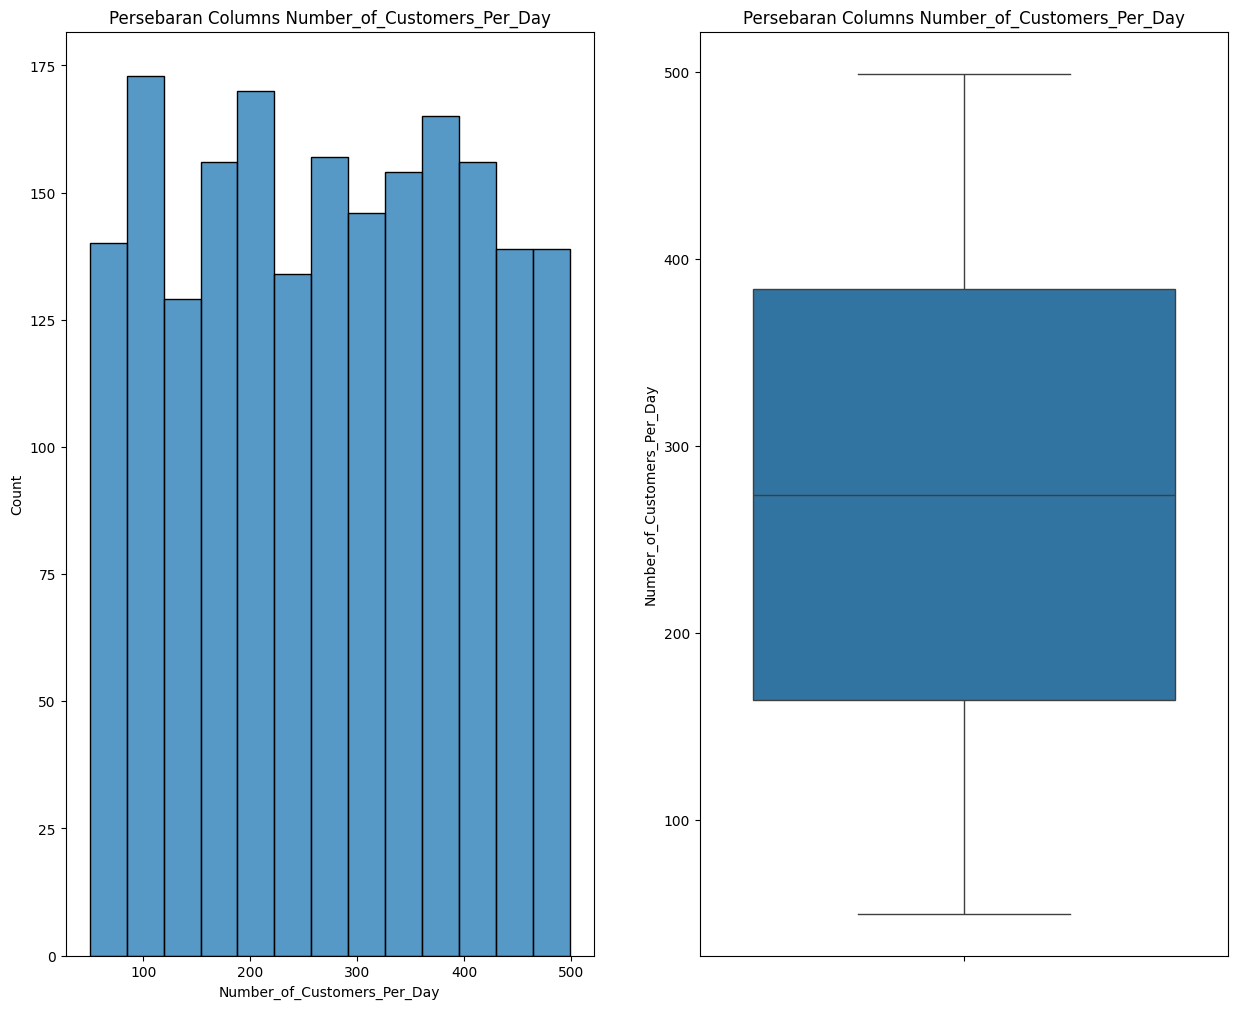

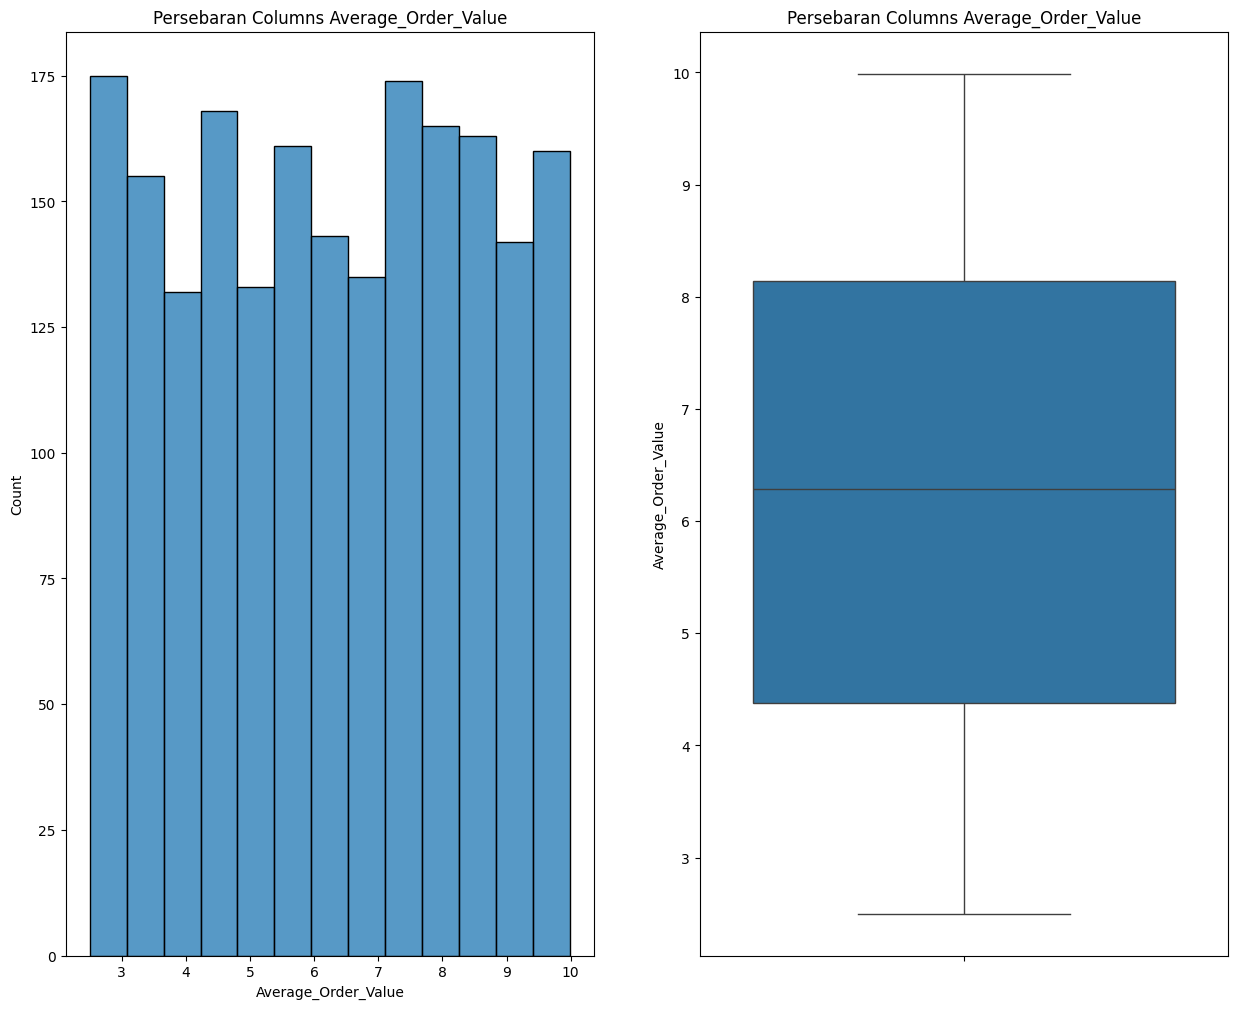

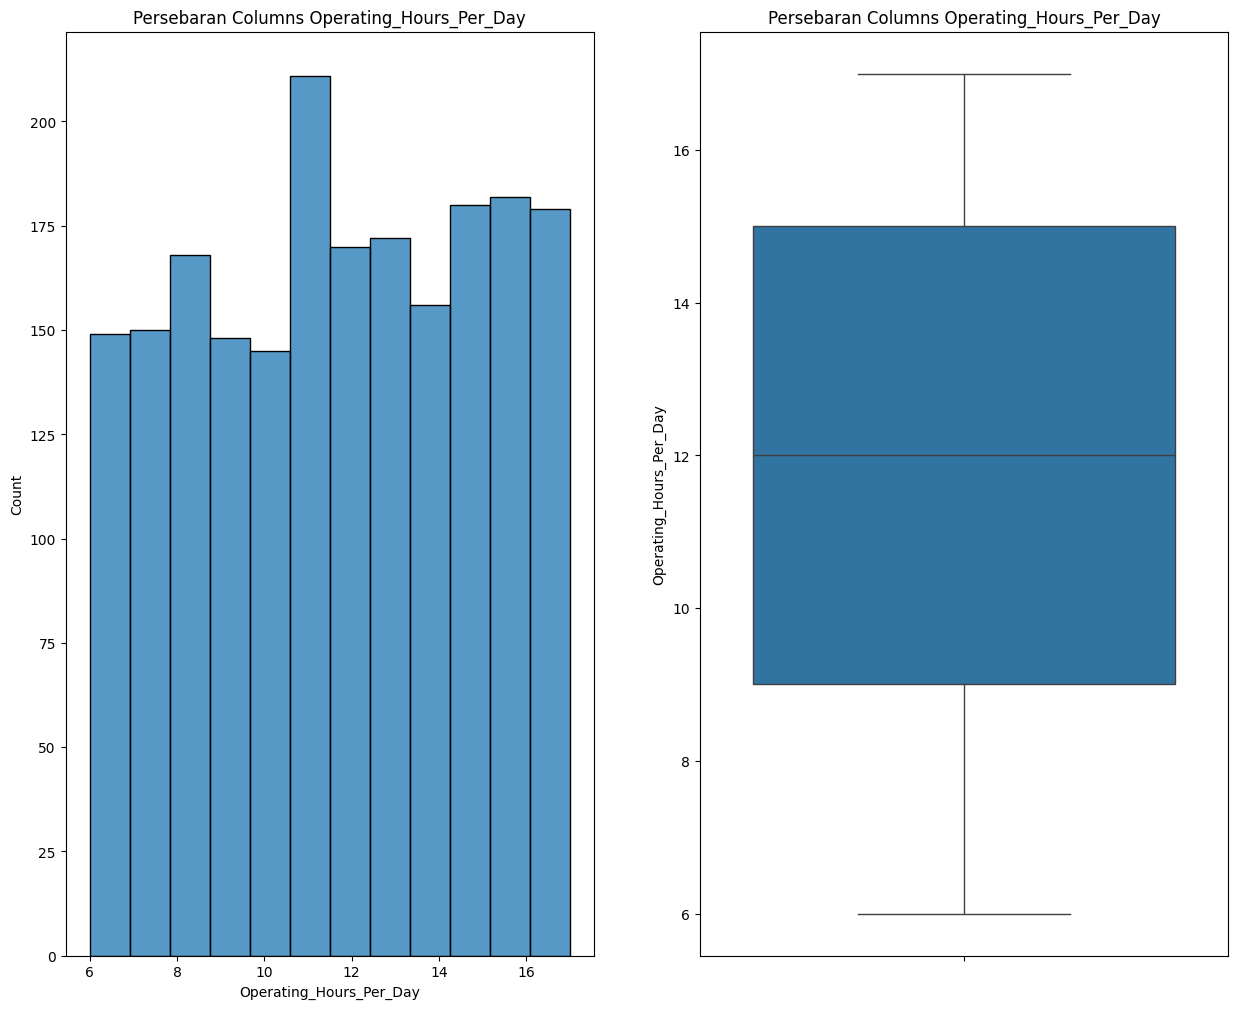

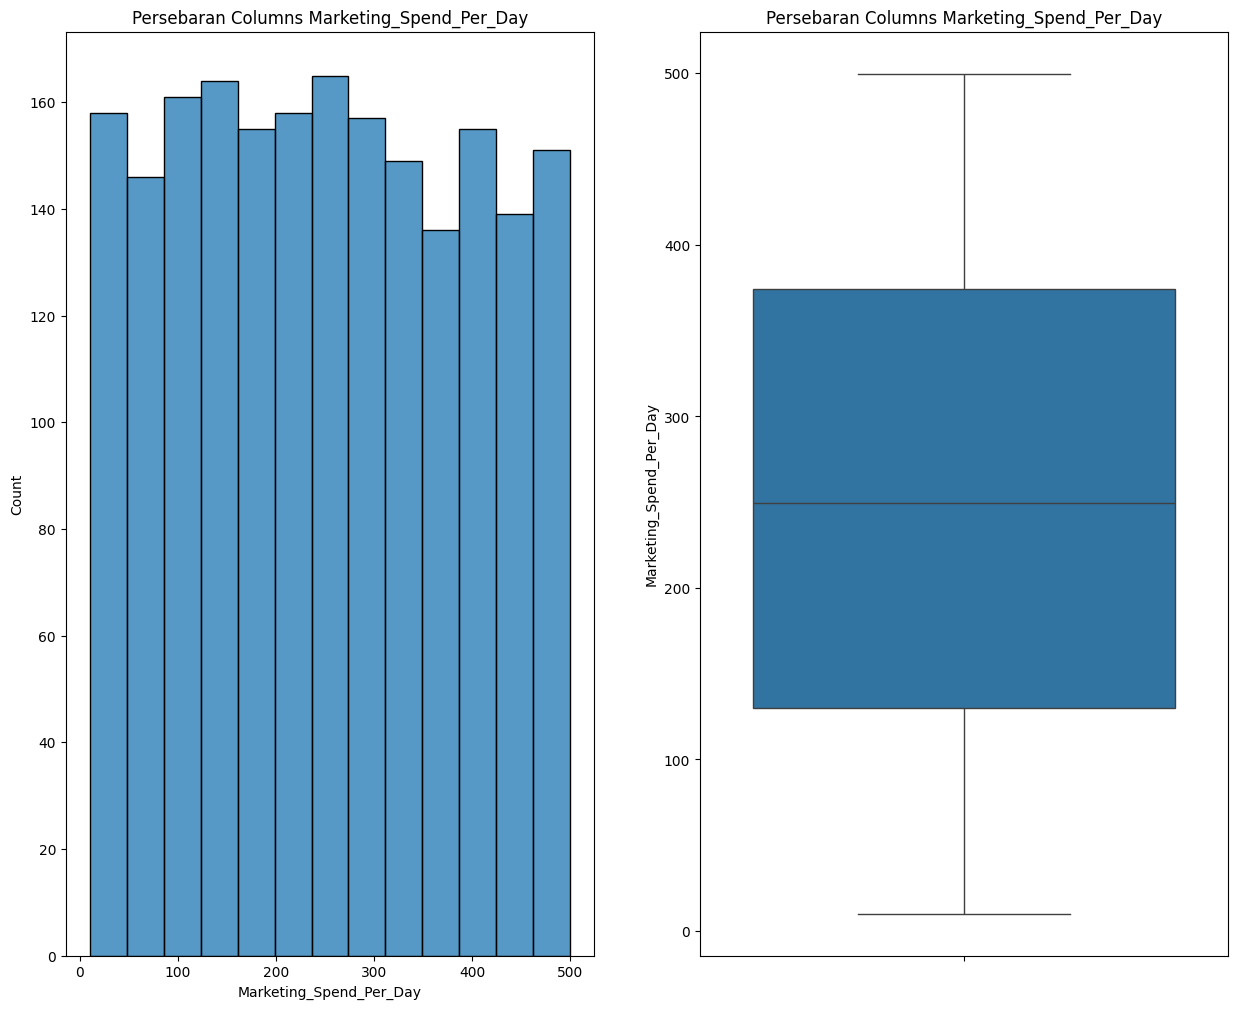

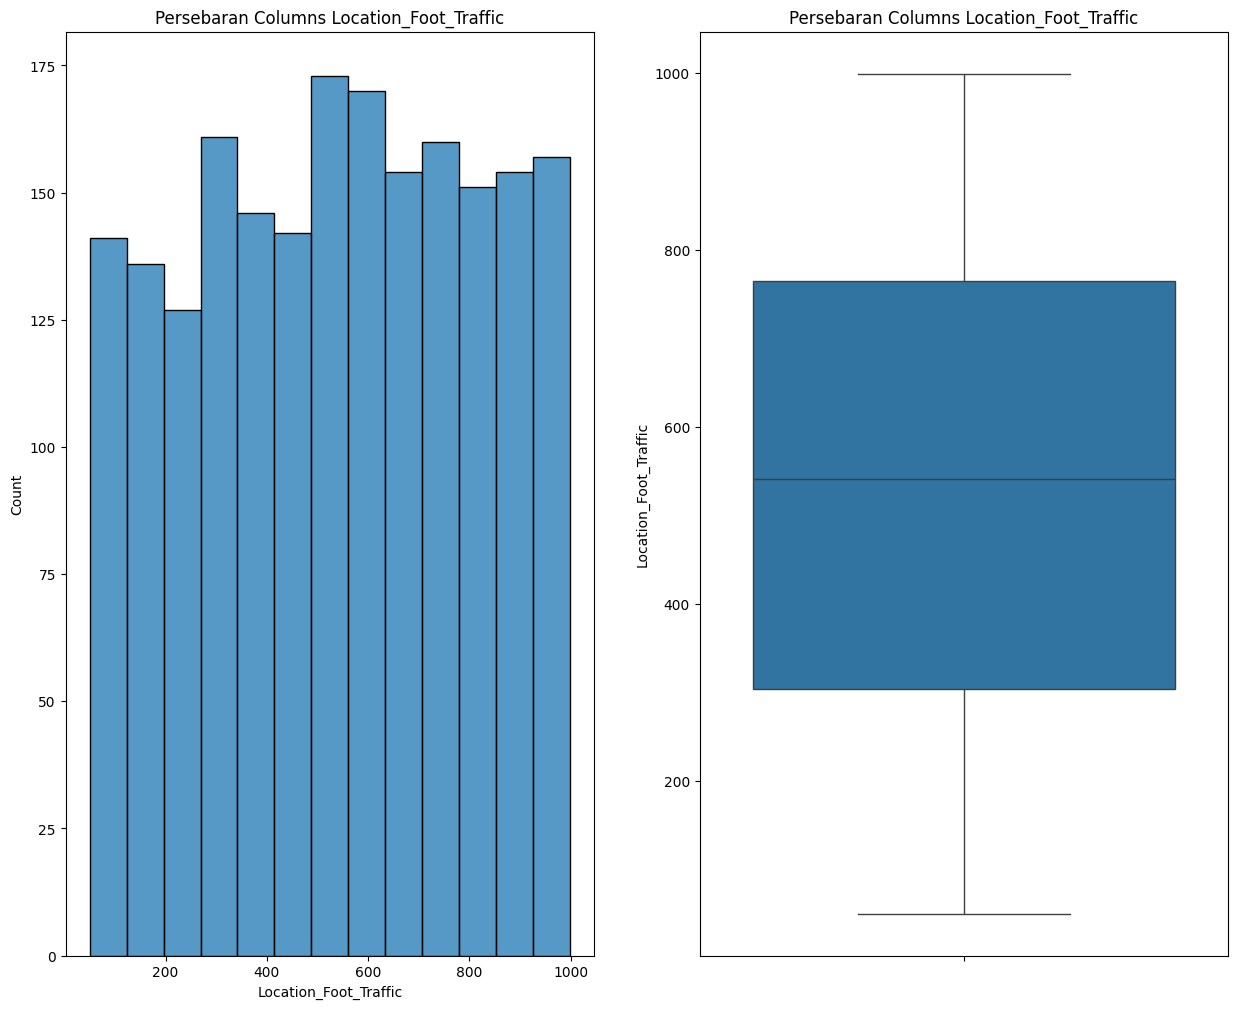

In [64]:
for col in coffe.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 12))
    sns.histplot(coffe[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(coffe[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
   

# INSIGHT

- Number_Of_Customers_Per_Day harusnya int (Karena jumlah orang)
- Average_Order_Value harusnya int (Karena transaksi mutlak)
- Operating_Hours_Per_Day harusnya int (Karena waktu per-jam)
- Location_Foot_Traffic harusnya int (Karena jumlah orang)
- Merubah Revenue_Level menjadi 0,1,2
- Menghapus duplicated sebanyak 200
- Tidak ada Outliers

## Missing Values
- Number_of_Customers_Per_Day  = rata rata
- Average_Order_Value          = rata rata
- Operating_Hours_Per_Day      = rata rata
- Marketing_Spend_Per_Day      = rata rata
- Location_Foot_Traffic        = rata rata
- Revenue_Level                = modus

STEP 2: DATA PREPARATION
- Dropping duplicate rows
- Dropping irrelevant columns
- Identifying duplicated columns
- Renaming columns
- Handling Missing Values
- Creating Date columns
- Outlier Detection

In [65]:
coffe.shape

(2200, 6)

In [66]:
coffe.duplicated().sum()

np.int64(200)

In [67]:
coffe.drop_duplicates(inplace=True)

In [68]:
coffe.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Marketing_Spend_Per_Day',
       'Location_Foot_Traffic', 'Revenue_Level'],
      dtype='object')

In [69]:
clean = coffe.copy()

In [70]:
mean = coffe[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Marketing_Spend_Per_Day',
       'Location_Foot_Traffic']].mean().round()

In [71]:
mean

Number_of_Customers_Per_Day    274.0
Average_Order_Value              6.0
Operating_Hours_Per_Day         12.0
Marketing_Spend_Per_Day        250.0
Location_Foot_Traffic          535.0
dtype: float64

In [72]:
clean[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Marketing_Spend_Per_Day',
       'Location_Foot_Traffic']]  = coffe[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Marketing_Spend_Per_Day',
       'Location_Foot_Traffic']].fillna(mean)

In [73]:
clean.isna().sum()

Number_of_Customers_Per_Day      0
Average_Order_Value              0
Operating_Hours_Per_Day          0
Marketing_Spend_Per_Day          0
Location_Foot_Traffic            0
Revenue_Level                  181
dtype: int64

In [74]:
clean[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Location_Foot_Traffic']] = clean[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Location_Foot_Traffic']].astype('int')

In [75]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   int64  
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Marketing_Spend_Per_Day      2000 non-null   float64
 4   Location_Foot_Traffic        2000 non-null   int64  
 5   Revenue_Level                1819 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 109.4+ KB


In [76]:
mode = clean['Revenue_Level'].mode()[0]

In [77]:
clean['Revenue_Level'] = clean['Revenue_Level'].fillna(mode)

In [78]:
clean['Revenue_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [79]:
mapping = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}

clean['Revenue_Level'] = clean['Revenue_Level'].map(mapping)

In [80]:
clean['Revenue_Level']

0       1
1       1
2       1
3       2
4       1
       ..
1995    2
1996    0
1997    0
1998    2
1999    0
Name: Revenue_Level, Length: 2000, dtype: int64

# INSIGHT

- Mengganti tipedata Number_Of_Customers_Per_Day menjadi int
- Mengganti tipedata Average_Order_Value menjadi int
- Mengganti tipedata Operating_Hours_Per_Day menjadi int
- Mengganti tipedata Location_Foot_Traffic menjadi int
- Merubah Label Target Revenue_Level menjadi 0,1,2 (int)
- Menghapus duplicated sebanyak 200

- Mengisi Missing Values:
    - Number_of_Customers_Per_Day  = mean
    - Average_Order_Value          = mean
    - Operating_Hours_Per_Day      = mean
    - Marketing_Spend_Per_Day      = mean
    - Location_Foot_Traffic        = mean
    - Revenue_Level                = modus/mode

STEP 3: UNIVARIATE ANALYSIS (FEATURE UNDERSTANDING)
- Analyzing Categorical Features
    - Value Counts, Bar Charts
- Analyzing Numerical Features
    - Histograms

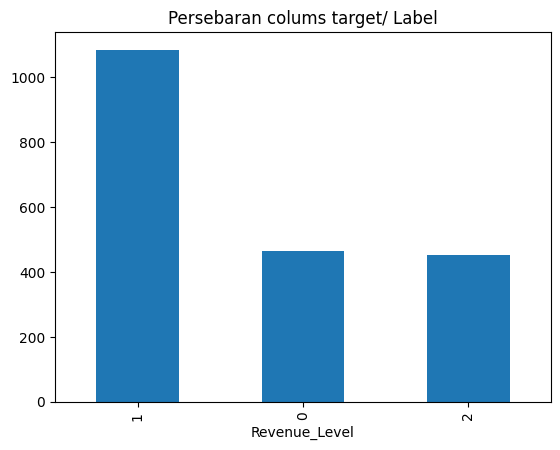

In [81]:
clean['Revenue_Level'].value_counts().plot(kind='bar').set_title("Persebaran colums target/ Label")
plt.show()

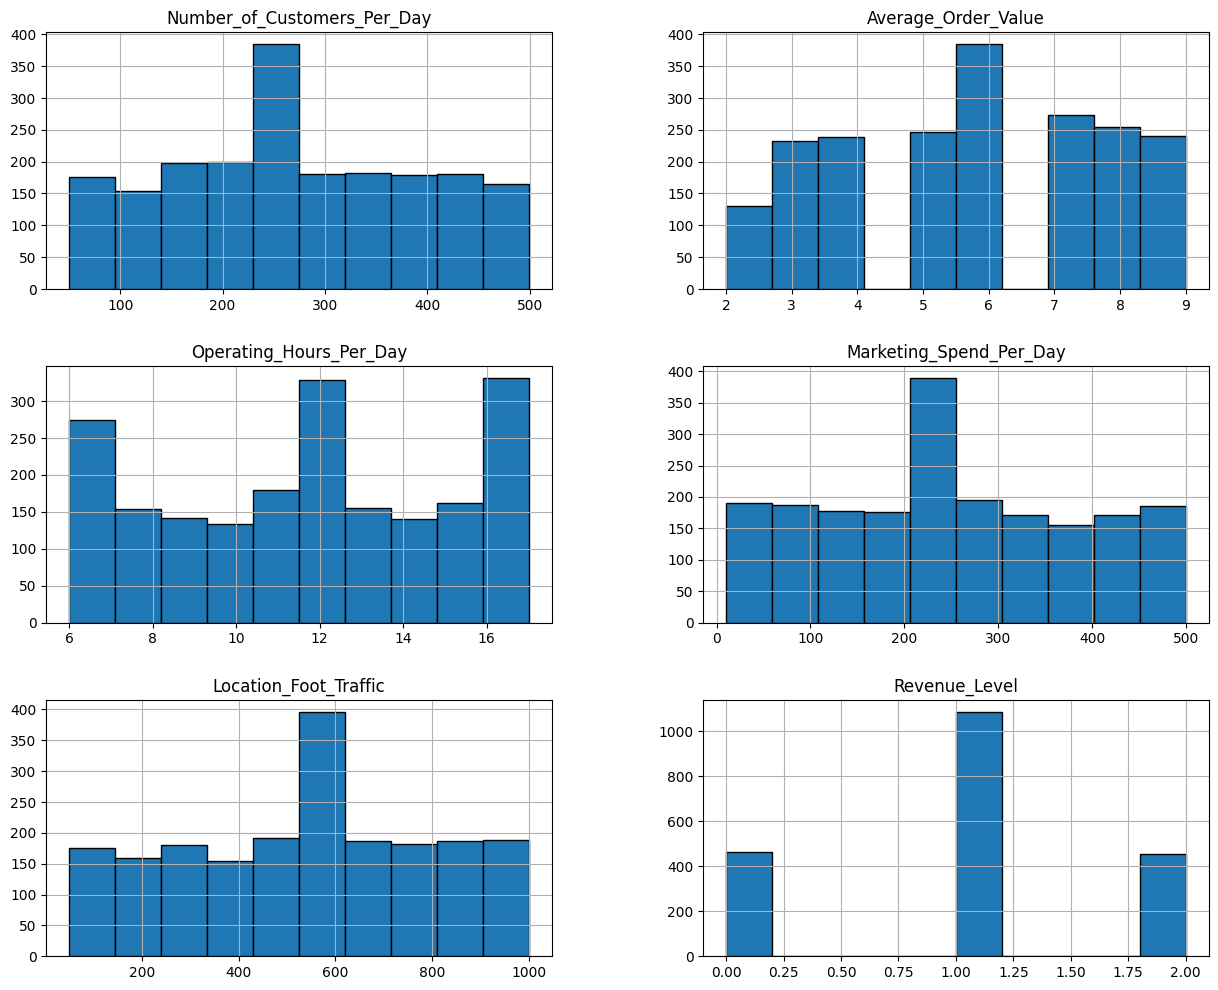

In [82]:
num = clean.select_dtypes(include='number')
num.hist(edgecolor='black', figsize=(15, 12))
plt.show()

In [83]:
clean.skew().round()

Number_of_Customers_Per_Day    0.0
Average_Order_Value           -0.0
Operating_Hours_Per_Day       -0.0
Marketing_Spend_Per_Day        0.0
Location_Foot_Traffic         -0.0
Revenue_Level                  0.0
dtype: float64

# INSIGHT

- Rata-rata pendapatan perhari terbanyak (Revenue Level) adalah 1/Medium
- Distribusi normal tetapi Target (Revenue Level) Imbalance

STEP 4: BIVARIATE AND MULTIVARIATE ANALYSIS (FEATURE RELATIONSHIPS)
- Numerical vs Numerical
    - Scatterplots, Correlation Matrix (heatmap), Pairplots

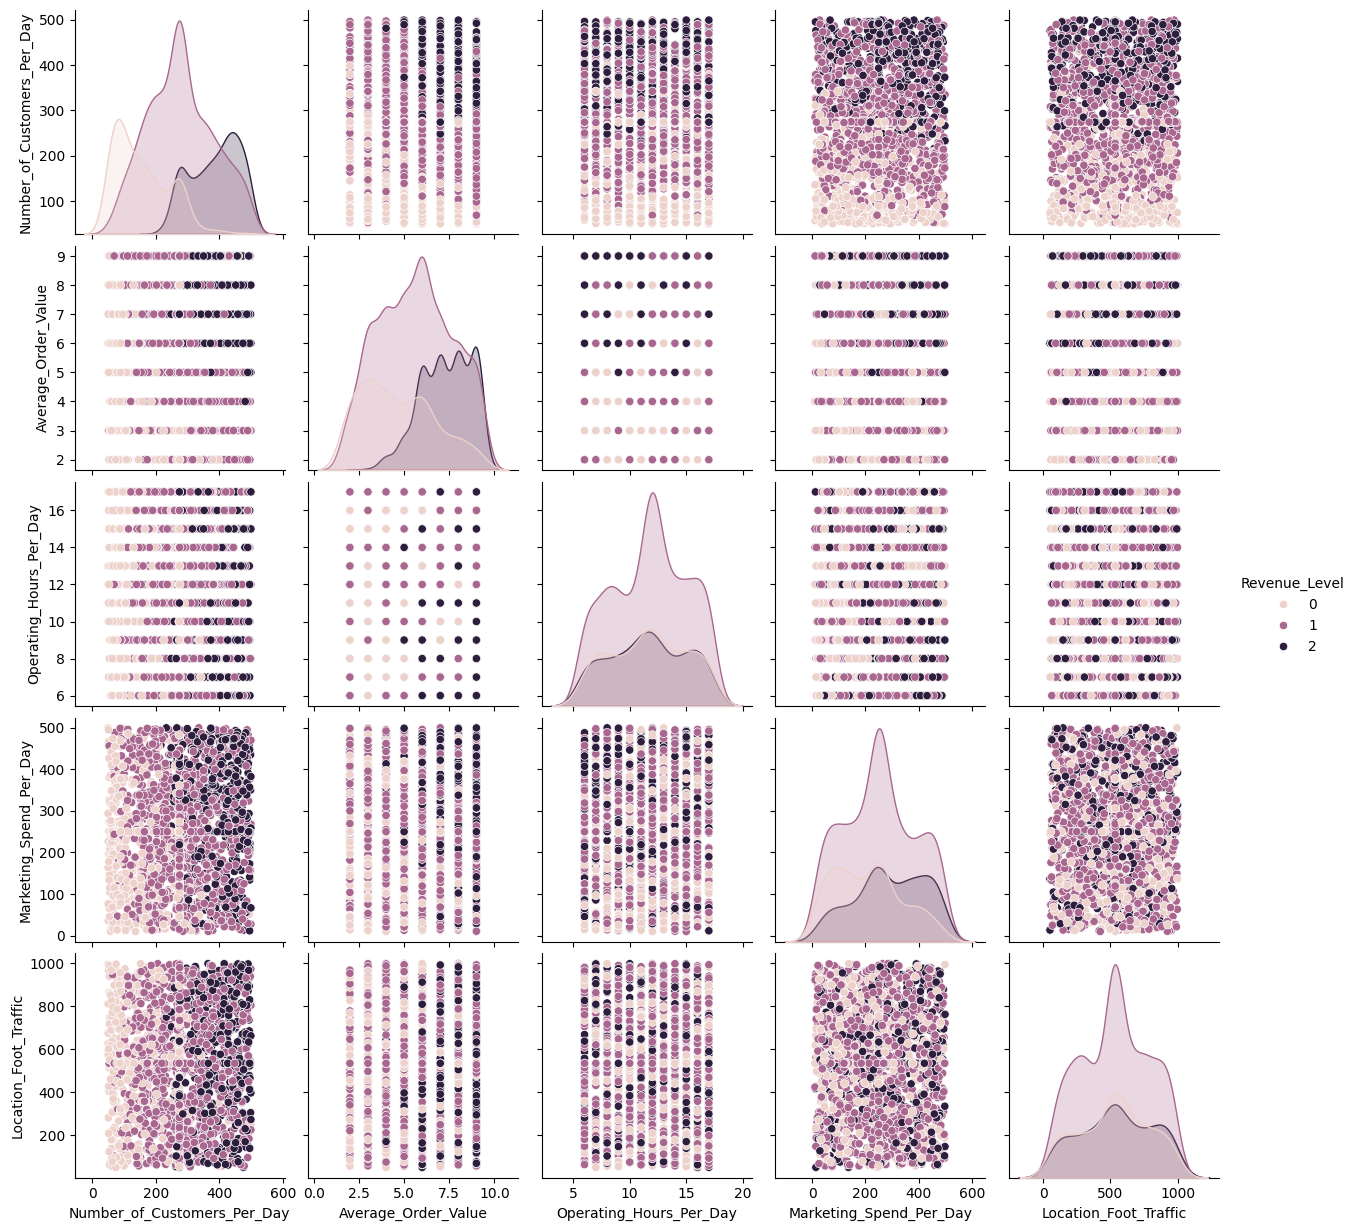

In [84]:
sns.pairplot(num, hue='Revenue_Level')

In [85]:
num.corr().style.format("{:.2f}").background_gradient(cmap="coolwarm")

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Revenue_Level
Number_of_Customers_Per_Day,1.00,0.00,-0.01,0.04,0.00,0.64
Average_Order_Value,0.00,1.00,-0.02,0.01,0.03,0.42
Operating_Hours_Per_Day,-0.01,-0.02,1.00,0.03,0.01,-0.00
Marketing_Spend_Per_Day,0.04,0.01,0.03,1.00,0.00,0.21
Location_Foot_Traffic,0.00,0.03,0.01,0.00,1.00,0.02
Revenue_Level,0.64,0.42,-0.00,0.21,0.02,1.00


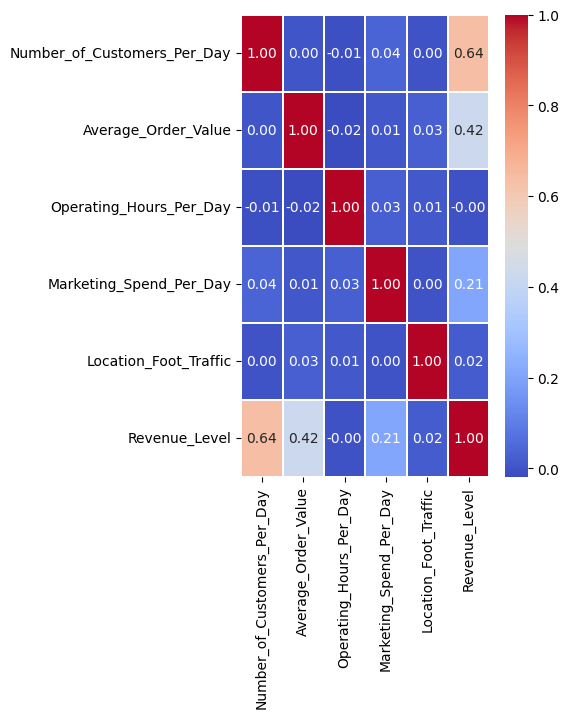

In [86]:
plt.figure(figsize=(4, 6))
sns.heatmap(num.corr(),
            annot=True,
            fmt='.2f',
            linewidths=1.1,
            cmap = 'coolwarm')
plt.show()

In [87]:
clean.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Marketing_Spend_Per_Day',
       'Location_Foot_Traffic', 'Revenue_Level'],
      dtype='object')

In [88]:
x = clean.drop(columns=['Operating_Hours_Per_Day', 'Revenue_Level', 'Location_Foot_Traffic'])
y = clean['Revenue_Level']

In [89]:
x.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day
0,152,6,106.62
1,485,4,57.83
2,398,9,91.76
3,320,8,250.00
4,274,7,412.52


standarisasi

In [90]:
y.head()

0    1
1    1
2    1
3    2
4    1
Name: Revenue_Level, dtype: int64

In [91]:
standar_col = ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day']

# standarisasi
# 2. Terapkan rumus (x - mean) / std ke seluruh kolom tersebut sekaligus
clean[standar_col] = (clean[standar_col] - clean[standar_col].mean()) / clean[standar_col].std()

# 3. Cek hasilnya
print(clean[standar_col].head())
    

   Number_of_Customers_Per_Day  Average_Order_Value  Marketing_Spend_Per_Day
0                    -1.001701             0.104971                -1.073735
1                     1.739133            -0.851485                -1.438030
2                     1.023059             1.539654                -1.184688
3                     0.381062             1.061427                -0.003175
4                     0.002449             0.583199                 1.210295


# Train Test Split dan Modeling

In [92]:
'''# --- KONFIGURASI ---
target_col = 'Revenue_Level'  # Kolom label/kunci jawaban
train_ratio = 0.8             # 80% untuk latihan, 20% untuk ujian

# ==========================================
# TAHAP 1: SHUFFLING & SPLITTING DATAFRAME
# ==========================================

# 1. Buat daftar nomor urut (Index)
indices = np.arange(len(clean))

# 2. Acak index tersebut (PENTING: pakai seed biar hasil tidak berubah-ubah)
np.random.seed(42)
np.random.shuffle(indices)

# 3. Hitung titik potong
split_point = int(len(clean) * train_ratio)

# 4. Bagi index menjadi dua kubu
train_indices = indices[:split_point]
test_indices = indices[split_point:]

# 5. Ambil data dari DataFrame 'clean' berdasarkan index tadi
train_data = clean.iloc[train_indices]
test_data = clean.iloc[test_indices]

# ==========================================
# TAHAP 2: PISAH FITUR (X) & TARGET (y)
# ==========================================

# Kita gunakan .values untuk mengubahnya jadi Numpy Array
# (Wajib untuk perhitungan manual matematika supaya index pandas tidak ikut)

# --- DATA TRAINING ---
X_train = train_data.drop(columns=[target_col]).values
y_train = train_data[target_col].values

# --- DATA TESTING ---
X_test = test_data.drop(columns=[target_col]).values
y_test = test_data[target_col].values

# ==========================================
# TAHAP 3: VALIDASI OUTPUT
# ==========================================
print(f"Total Data Awal : {len(clean)}")
print("-" * 30)
print(f"Data Train (X)  : {X_train.shape}  (Baris, Kolom)")
print(f"Data Train (y)  : {y_train.shape}  (Label)")
print("-" * 30)
print(f"Data Test (X)   : {X_test.shape}   (Baris, Kolom)")
print(f"Data Test (y)   : {y_test.shape}   (Label)")
print("-" * 30)
print("Siap masuk ke fungsi KNN Manual!")'''

'# --- KONFIGURASI ---\ntarget_col = \'Revenue_Level\'  # Kolom label/kunci jawaban\ntrain_ratio = 0.8             # 80% untuk latihan, 20% untuk ujian\n\n# ==========================================\n# TAHAP 1: SHUFFLING & SPLITTING DATAFRAME\n# ==========================================\n\n# 1. Buat daftar nomor urut (Index)\nindices = np.arange(len(clean))\n\n# 2. Acak index tersebut (PENTING: pakai seed biar hasil tidak berubah-ubah)\nnp.random.seed(42)\nnp.random.shuffle(indices)\n\n# 3. Hitung titik potong\nsplit_point = int(len(clean) * train_ratio)\n\n# 4. Bagi index menjadi dua kubu\ntrain_indices = indices[:split_point]\ntest_indices = indices[split_point:]\n\n# 5. Ambil data dari DataFrame \'clean\' berdasarkan index tadi\ntrain_data = clean.iloc[train_indices]\ntest_data = clean.iloc[test_indices]\n\n# ==========================================\n# TAHAP 2: PISAH FITUR (X) & TARGET (y)\n# ==========================================\n\n# Kita gunakan .values untuk mengubahnya 

In [93]:
'''from collections import Counter

def knn_manual(X_train, y_train, data_baru, k=5):
    """
    Fungsi untuk memprediksi label satu data baru berdasarkan K tetangga terdekat.
    """
    
    # --- LANGKAH 1: Hitung Jarak Euclidean ---
    # Rumus: Akar dari jumlah kuadrat selisih
    # Kita hitung jarak data_baru ke SELURUH X_train sekaligus (Vectorization)
    distances = np.sqrt(np.sum((X_train - data_baru)**2, axis=1))
    
    # --- LANGKAH 2: Ambil K Tetangga Terdekat ---
    # np.argsort mengembalikan INDEX data dari jarak terkecil ke terbesar
    k_indices = np.argsort(distances)[:k]
    
    # Ambil label (kunci jawaban) dari index tetangga tersebut
    k_nearest_labels = y_train[k_indices]
    
    # --- LANGKAH 3: Voting (Mayoritas Menang) ---
    # Cari label yang paling sering muncul di antara tetangga
    vote_result = Counter(k_nearest_labels).most_common(1)[0][0]
    
    return vote_result'''

'from collections import Counter\n\ndef knn_manual(X_train, y_train, data_baru, k=5):\n    """\n    Fungsi untuk memprediksi label satu data baru berdasarkan K tetangga terdekat.\n    """\n\n    # --- LANGKAH 1: Hitung Jarak Euclidean ---\n    # Rumus: Akar dari jumlah kuadrat selisih\n    # Kita hitung jarak data_baru ke SELURUH X_train sekaligus (Vectorization)\n    distances = np.sqrt(np.sum((X_train - data_baru)**2, axis=1))\n\n    # --- LANGKAH 2: Ambil K Tetangga Terdekat ---\n    # np.argsort mengembalikan INDEX data dari jarak terkecil ke terbesar\n    k_indices = np.argsort(distances)[:k]\n\n    # Ambil label (kunci jawaban) dari index tetangga tersebut\n    k_nearest_labels = y_train[k_indices]\n\n    # --- LANGKAH 3: Voting (Mayoritas Menang) ---\n    # Cari label yang paling sering muncul di antara tetangga\n    vote_result = Counter(k_nearest_labels).most_common(1)[0][0]\n\n    return vote_result'

In [94]:
'''# --- KONFIGURASI ---
K = 5  # Jumlah tetangga (usahakan ganjil)
y_pred = [] # List kosong untuk menampung jawaban mesin

print(f"Sedang memprediksi {len(X_test)} data test dengan K={K}...")

# --- LOOP PREDIKSI ---
for i in range(len(X_test)):
    # Ambil 1 baris soal dari data test
    data_soal = X_test[i]
    
    # Minta mesin KNN menjawab
    hasil_prediksi = knn_manual(X_train, y_train, data_soal, k=K)
    
    # Simpan jawaban
    y_pred.append(hasil_prediksi)

# Ubah ke numpy array agar mudah dihitung
y_pred = np.array(y_pred)

print("Prediksi Selesai!")

# --- HITUNG AKURASI MANUAL ---
# Logika: Berapa persen jawaban komputer (y_pred) sama dengan kunci jawaban (y_test)?
jumlah_benar = np.sum(y_pred == y_test)
total_data = len(y_test)
akurasi = jumlah_benar / total_data

print("\n" + "="*30)
print(f"HASIL AKURASI MANUAL")
print("="*30)
print(f"Benar   : {jumlah_benar} dari {total_data} data")
print(f"Akurasi : {akurasi * 100:.2f}%")
print("="*30)

# --- CONTOH SAMPEL ---
print("\n5 Perbandingan Pertama:")
print(f"{'Prediksi':<15} | {'Aktual':<15} | {'Status'}")
print("-" * 45)
for i in range(5):
    status = "✅" if y_pred[i] == y_test[i] else "❌"
    print(f"{str(y_pred[i]):<15} | {str(y_test[i]):<15} | {status}")'''

'# --- KONFIGURASI ---\nK = 5  # Jumlah tetangga (usahakan ganjil)\ny_pred = [] # List kosong untuk menampung jawaban mesin\n\nprint(f"Sedang memprediksi {len(X_test)} data test dengan K={K}...")\n\n# --- LOOP PREDIKSI ---\nfor i in range(len(X_test)):\n    # Ambil 1 baris soal dari data test\n    data_soal = X_test[i]\n\n    # Minta mesin KNN menjawab\n    hasil_prediksi = knn_manual(X_train, y_train, data_soal, k=K)\n\n    # Simpan jawaban\n    y_pred.append(hasil_prediksi)\n\n# Ubah ke numpy array agar mudah dihitung\ny_pred = np.array(y_pred)\n\nprint("Prediksi Selesai!")\n\n# --- HITUNG AKURASI MANUAL ---\n# Logika: Berapa persen jawaban komputer (y_pred) sama dengan kunci jawaban (y_test)?\njumlah_benar = np.sum(y_pred == y_test)\ntotal_data = len(y_test)\nakurasi = jumlah_benar / total_data\n\nprint("\n" + "="*30)\nprint(f"HASIL AKURASI MANUAL")\nprint("="*30)\nprint(f"Benar   : {jumlah_benar} dari {total_data} data")\nprint(f"Akurasi : {akurasi * 100:.2f}%")\nprint("="*30)\n\n#